In [30]:
import pandas as pd
import matplotlib.pyplot as plt
demo = pd.read_csv('MSA_Race_Income_Density_BuildingAge.csv')

In [31]:
CBSAair = pd.read_csv("annual_aqi_by_cbsa_2017.csv")

In [32]:
# SE_T002_002 Population Density
# SE_T014_003 White Not Latino
# SE_T014_001 Total Population
# SE_T057_001 Median Household Income
# Geo_NAME Area Name + Micro/Metro
# Geo_FIPS code

In [33]:
demo["Geo"] = demo["Geo_NAME"].str.split(' ').str[0:-3].str.join(' ')
demo["CBSA Code"] = demo["Geo_FIPS"]% 100000

In [34]:
demo_mini = demo[["Geo","CBSA Code", "SE_T002_002", "SE_T014_003", "SE_T014_001", "SE_T057_001"]]
demo_mini = demo_mini.set_index("CBSA Code")
CBSAair = CBSAair.set_index("CBSA Code")

In [35]:
CBSAs = CBSAair.join(demo_mini)

In [64]:
CBSAs["Density"] = CBSAs["SE_T002_002"]
CBSAs["Income"] = CBSAs["SE_T057_001"]
CBSAs["Population"] = CBSAs['SE_T014_001']
CBSAs["Minority"] = 1 - CBSAs["SE_T014_003"]/CBSAs["SE_T014_001"]
CBSAs = CBSAs.dropna(axis=0)

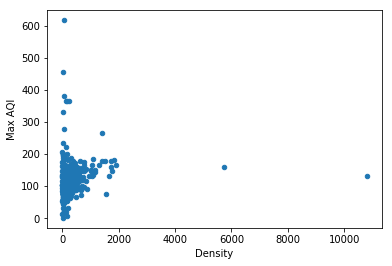

In [37]:
CBSAs.plot(x = "Density", y = "Max AQI", kind = 'scatter')
#plt.xlim((0, 3000))
#plt.ylim((0,250))
plt.show()

In [108]:
#Cut upper extreme (1%)
q = CBSAs["Max AQI"].quantile(.99)
CBSAs_cut = CBSAs[CBSAs["Max AQI"] < q]
CBSAs_cut = CBSAs_cut[CBSAs_cut["Population"] < 10000000] #Remove NYC
CBSAs_cut = CBSAs_cut[CBSAs_cut["Density"] < 10000] #Remove DC Metro

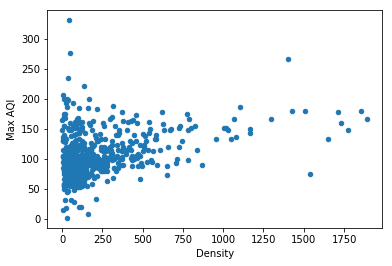

In [111]:
CBSAs_cut.plot(x = "Density", y = "Max AQI", kind = 'scatter')
plt.show()

In [119]:
CBSAs_cut2 = CBSAs_cut[CBSAs_cut["Density"] >250]

In [120]:
CBSAs_cut2.corr()["Density"]["Max AQI"]

0.47477221648290407

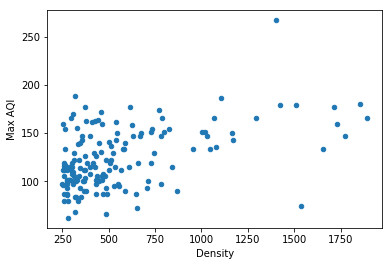

In [121]:
CBSAs_cut2.plot(x = "Density", y = "Max AQI", kind = 'scatter')
plt.show()